In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
import bamboolib as bam

In [2]:
# Import model

expected_model_version = '1.0'
model_path = r'C:\Users\1\Documents\GitHub\Github_Springboard\DataScienceGuidedCapstone-master\Step Five - Modeling\models\ski_resort_pricing_model.pkl'
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
    if model.sklearn_version != sklearn_version:
        print("Warning: model created under different sklearn version")
else:
    print("Expected model not found")

In [3]:
# Import data
ski_data = pd.read_csv(r'C:\Users\1\Documents\GitHub\Github_Springboard\DataScienceGuidedCapstone-master\Step Four - Preprocessing and Training\data\ski_data_step4_features.csv')

In [4]:
# Define subset for plot data
dfPlot = ski_data.copy()

In [5]:
# Subset rows for plot data
dfPlot.dropna(subset=['AdultWeekend'], inplace=True)

In [6]:
# Subset cols for model prediction
x_features = dfPlot.set_index(['Name','Region','state']).copy()
x_bmr = x_features.loc['Big Mountain Resort',model.X_columns].copy()

In [7]:
# Define model plot parameters
modelPlotCount = 10
maxVals = x_features.max()
minVals = x_features.min()
plotInterval = (maxVals - minVals) / modelPlotCount
xColsCount = len(model.X_columns)

In [8]:
# Define empty DataFrames for iterating through model prediction scenarios
df = pd.DataFrame(index=[i for i in range(0,modelPlotCount)], columns = model.X_columns, dtype=float).copy()
x_modelVars = df.copy()
y_modelOutput = df.copy()

In [9]:
# Populate x_modelVars with features variables at each interval
x_modelVars.iloc[0,:] = minVals
for i in range(1,modelPlotCount):
    x_modelVars.iloc[i,:] = x_modelVars.iloc[i-1,:] + plotInterval

In [10]:
# Populate y_modelOutput with adjusted predictions for each value in x_modelVars
for col in range(0,xColsCount):
    for row in range(0,modelPlotCount):
        x_bmrMod = x_bmr.copy()
        x_bmrMod.iloc[0,col] = x_modelVars.iloc[row,col]
        y_modelOutput.iloc[row,col] = model.predict(x_bmrMod).item()
        #print('r' + str(row))
    print('c' + str(col))

c0
c1
c2
c3
c4
c5
c6
c7
c8
c9
c10
c11
c12
c13
c14
c15
c16
c17
c18
c19
c20
c21
c22
c23
c24
c25
c26
c27
c28
c29
c30
c31


In [11]:
#y_modelOutput

In [283]:
plotFeatures = 'fastQuads'

In [284]:
sPlotData = dfPlot.copy()

In [285]:
sPlotData = sPlotData.set_index('Name')

In [286]:
def setHue(state):
    if state == 'Montana': return 'Montana'
    elif state in ['Idaho','Wyoming','North Dakota','South Dakota']: return 'Adjacent State'
    else: return 'Other'

In [287]:
sPlotData['hue'] = sPlotData['state'].apply(setHue)

In [288]:
sPlotData.loc['Big Mountain Resort','hue'] = 'Big Mountain Resort'

In [289]:
sPlotData.loc['Big Mountain Resort','hue']

'Big Mountain Resort'

In [290]:
sPlotData['PointSize'] = 0

In [291]:
sPlotData.loc['Big Mountain Resort','PointSize'] = 5

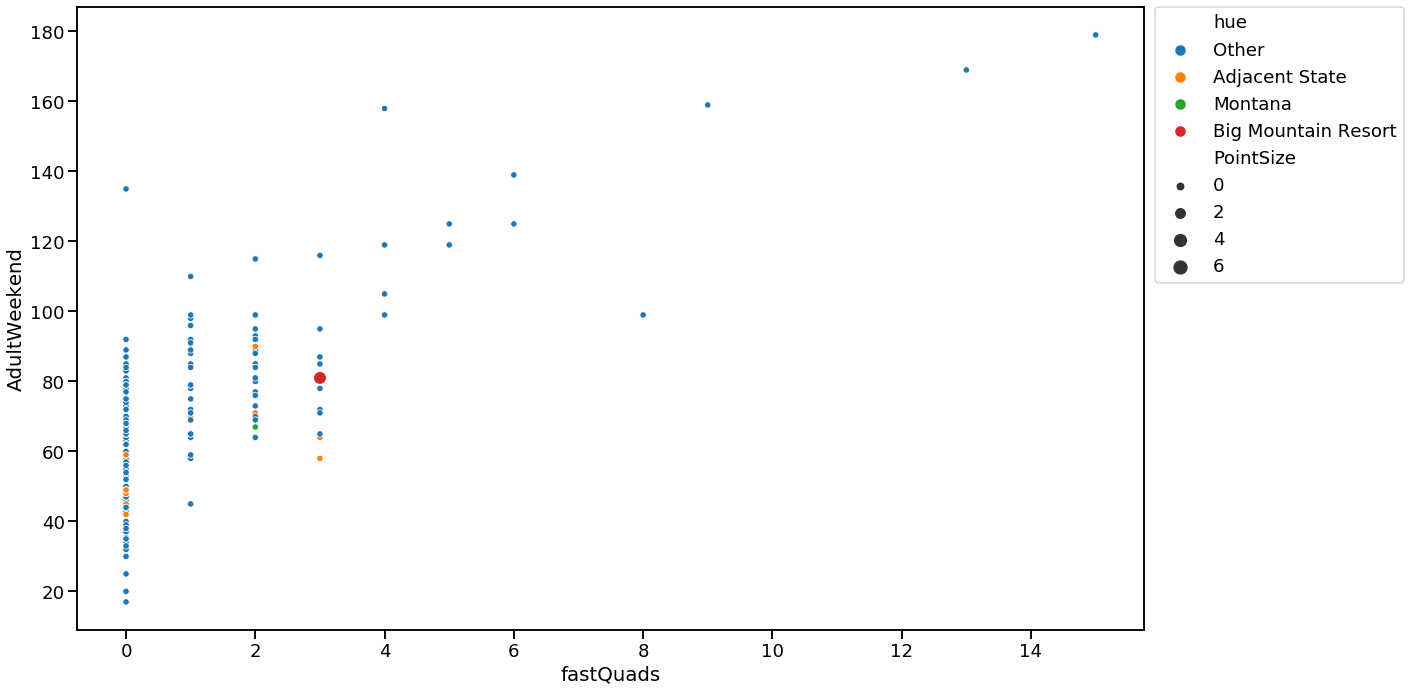

In [292]:
sb.set_context("talk", font_scale=1.1)
plt.figure(figsize=(20,10))
sb.scatterplot(x=plotFeatures, y='AdultWeekend', hue='hue', data=sPlotData, size='PointSize')

plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.tight_layout()

plt.savefig("default_legend_position_Seaborn_scatterplot.png",
                    format='png',dpi=150)

In [365]:
ax2 = ax.twinx()

In [296]:
modelLine = []

In [297]:
modelLine = pd.DataFrame(index = x_modelVars.index,dtype=float)

In [298]:
y_modelOutput[plotFeatures]

0     83.93881
1     91.70120
2     91.78420
3    114.77400
4    118.10900
5    118.34700
6    122.35600
7    122.80500
8    123.42200
9    123.42200
Name: fastQuads, dtype: float64

In [299]:
y_modelOutput

,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,triple,double,surface,...,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio
0,91.21839,90.1314,91.91099,91.7842,91.7842,83.93881,90.7630,91.09619,91.78420,91.4812,...,92.93319,91.7522,92.1392,97.95299,92.7192,91.95920,90.89920,92.8282,91.9456,91.6154
1,91.55339,90.3174,91.90320,91.7842,91.7842,91.70120,91.2362,91.33819,91.65319,91.2492,...,92.80819,91.8212,92.2092,92.90199,92.3472,92.40819,91.76520,92.0092,91.7602,91.7882
2,91.79520,91.3234,91.81920,91.9152,91.7842,91.78420,91.7842,92.12019,91.56319,91.7772,...,92.97020,91.7332,92.1252,92.68000,92.0912,92.20319,92.02320,91.7942,91.6852,91.8182
3,91.71020,91.5282,91.75020,91.9152,92.6962,114.77400,91.7822,92.14219,91.76219,91.7842,...,92.61920,91.8702,92.0242,91.78920,91.9392,92.19419,92.06220,91.9852,91.6962,91.7722
4,91.44520,91.5142,91.83220,91.9152,92.6962,118.10900,91.9412,92.09019,91.76619,91.7962,...,91.74020,92.0022,91.7852,91.81320,91.7842,92.19419,92.12520,91.9852,91.8882,91.7582
5,91.78720,91.7392,91.72320,91.9152,92.6962,118.34700,91.9412,92.09719,91.77219,91.7962,...,91.78420,92.1984,91.8542,91.85420,91.7952,92.20819,92.23317,91.9442,91.9082,91.7812
6,91.80920,97.6392,91.96920,92.0572,92.7632,122.35600,91.9382,92.09819,91.77219,91.8512,...,91.83320,92.1964,91.8102,91.88020,91.8112,92.20419,93.58317,91.9012,92.0742,91.7902
7,92.85220,100.2120,91.82920,92.3022,92.7632,122.80500,91.7402,91.78420,91.77219,91.8362,...,91.90120,92.2054,91.8422,91.87420,91.8112,92.23919,93.58317,91.9012,92.0742,91.7952
8,92.92520,100.1770,91.90620,92.3022,93.7282,123.42200,91.6992,91.78420,91.77219,91.8362,...,91.90120,92.2954,91.8672,91.87420,91.8112,92.23919,93.58317,91.9012,92.0742,91.7842
9,93.11520,100.4460,91.80220,92.3022,93.7282,123.42200,91.6992,91.78420,91.77219,92.1942,...,91.97520,92.2934,91.7672,91.86520,91.8112,92.23919,93.58317,91.9012,92.0742,91.7842


In [300]:
modelLine['y'] = y_modelOutput[plotFeatures]

In [301]:
modelLine['x'] = x_modelVars[plotFeatures]

In [302]:
x_modelVars

,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,triple,double,surface,...,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio
0,440.0,60.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,69.0,1.0,0.0,0.014643,0.450867,0.001145,0.002542,0.012346,0.003115
1,1744.7,496.5,1170.0,0.3,0.2,1.5,0.8,0.8,1.4,0.9,...,4368.2,387.9,9.0,283.6,0.253568,17.519911,0.101030,0.102288,0.111111,0.102804
2,3049.4,933.0,2240.0,0.6,0.4,3.0,1.6,1.6,2.8,1.8,...,8736.4,706.8,17.0,567.2,0.492492,34.588954,0.200916,0.202034,0.209877,0.202492
3,4354.1,1369.5,3310.0,0.9,0.6,4.5,2.4,2.4,4.2,2.7,...,13104.6,1025.7,25.0,850.8,0.731417,51.657997,0.300801,0.301780,0.308642,0.302181
4,5658.8,1806.0,4380.0,1.2,0.8,6.0,3.2,3.2,5.6,3.6,...,17472.8,1344.6,33.0,1134.4,0.970341,68.727040,0.400687,0.401525,0.407407,0.401869
5,6963.5,2242.5,5450.0,1.5,1.0,7.5,4.0,4.0,7.0,4.5,...,21841.0,1663.5,41.0,1418.0,1.209266,85.796083,0.500572,0.501271,0.506173,0.501558
6,8268.2,2679.0,6520.0,1.8,1.2,9.0,4.8,4.8,8.4,5.4,...,26209.2,1982.4,49.0,1701.6,1.448190,102.865126,0.600458,0.601017,0.604938,0.601246
7,9572.9,3115.5,7590.0,2.1,1.4,10.5,5.6,5.6,9.8,6.3,...,30577.4,2301.3,57.0,1985.2,1.687115,119.934169,0.700343,0.700763,0.703704,0.700935
8,10877.6,3552.0,8660.0,2.4,1.6,12.0,6.4,6.4,11.2,7.2,...,34945.6,2620.2,65.0,2268.8,1.926039,137.003212,0.800229,0.800508,0.802469,0.800623
9,12182.3,3988.5,9730.0,2.7,1.8,13.5,7.2,7.2,12.6,8.1,...,39313.8,2939.1,73.0,2552.4,2.164964,154.072255,0.900114,0.900254,0.901235,0.900312


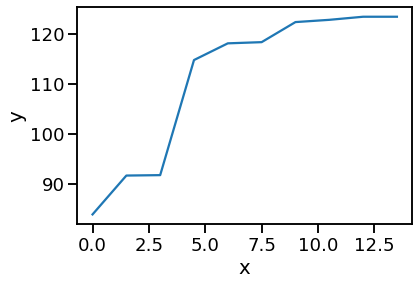

In [303]:
sb.lineplot(x='x', y='y', data=modelLine)

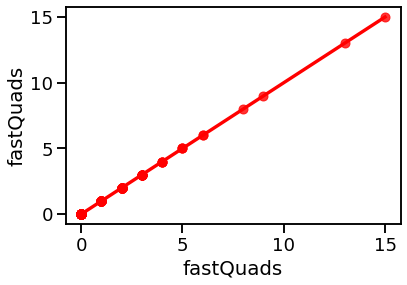

In [293]:
fig, ax = plt.subplots()
sb.regplot(x=plotFeatures, y=plotFeatures, color='r', data=sPlotData)  #, ax=ax)
plt.show()

In [209]:
sb.regplot(x='vertical_drop', y='AdultWeekend', data=dfPlot, ax=ax)

In [376]:
sb.show()

AttributeError: module 'seaborn' has no attribute 'show'

In [57]:
X_bm

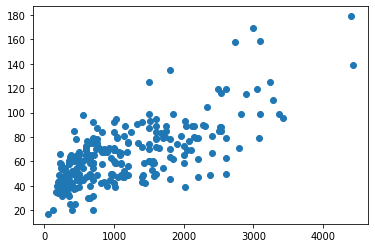

In [101]:
plt.scatter(x,y)

In [ ]:
X_bm

In [ ]:
# Divide y from x plot parameters
x_features = dfPlot
y_prices = pd.DataFrame(x_features.pop('AdultWeekend'))
y_bmrPrice = x_bmr.pop('AdultWeekend')

In [58]:
x_modelVars.loc[:,features]

,vertical_drop
0,60
1,103.65
2,147.3
3,190.95
4,234.6
...,...
95,4206.75
96,4250.4
97,4294.05
98,4337.7


In [59]:
dfGraph = pd.DataFrame(columns=features, index=x_modelVars.index)


In [62]:
dfGraph = x_modelVars.loc[:,features]

In [63]:
dfGraph

,vertical_drop
0,60
1,103.65
2,147.3
3,190.95
4,234.6
...,...
95,4206.75
96,4250.4
97,4294.05
98,4337.7


In [61]:
dfGraph.loc[features] = x_modelVars.loc[:,features]

KeyError: "None of [Index(['vertical_drop'], dtype='object')] are in the [index]"

In [45]:
dfGraph = dfGraph.reset_index()
dfGraph

,x,y,hue


In [ ]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)